In [1]:
import sys
sys.path.append('../src/')

In [2]:
import os.path as osp
import os

import pandas as pd
import numpy as np

import seaborn as sb
from matplotlib import pyplot as plt

from metrics import linear_area_score as area_score

from utils import normalize_bounds, load_curves

In [3]:
sb.set_theme(context='paper', style='white', font_scale=1.5, palette=None)

In [4]:
graph_model = 'cora'

In [5]:
explainer = 'ig'
decoder = 'inner'
for model_name in ['vgae', 'gin', 'sage', 'gcn']:
    print(model_name, len(os.listdir(f"../outputs/{graph_model}/{model_name}/{explainer}/curves/")))

vgae 1011
gin 671
sage 561
gcn 629


In [7]:
tot_range = 526

In [8]:
max_sparsity = 100

# Deletion

In [9]:
model_name = 'vgae'

edge_deletions = load_curves(graph_model, model_name, explainer, 'edge_deletion', tot_range, target=-1, seed='0')
vgae_edge_scores = np.array([area_score(d) for d in edge_deletions])

feat_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed='0')
vgae_feat_scores = np.array([area_score(d) for d in feat_deletions])

cora vgae ig edge_deletion 526 -1
500
cora vgae ig feature_deletion 526 -1
500


In [10]:
model_name = 'gin'

edge_deletions = load_curves(graph_model, model_name, explainer, 'edge_deletion', tot_range, target=-1, seed='0')
gin_edge_scores = np.array([area_score(d) for d in edge_deletions])

feat_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed='0')
gin_feat_scores = np.array([area_score(d) for d in feat_deletions])

cora gin ig edge_deletion 526 -1
336
cora gin ig feature_deletion 526 -1
335


In [11]:
model_name = 'gcn'

edge_deletions = load_curves(graph_model, model_name, explainer, 'edge_deletion', tot_range, target=-1, seed='0')
gcn_edge_scores = np.array([area_score(d) for d in edge_deletions])

feat_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed='0')
gcn_feat_scores = np.array([area_score(d) for d in feat_deletions])

cora gcn ig edge_deletion 526 -1
315
cora gcn ig feature_deletion 526 -1
314


In [12]:
model_name = 'sage'

edge_deletions = load_curves(graph_model, model_name, explainer, 'edge_deletion', tot_range, target=-1, seed='0')
sage_edge_scores = np.array([area_score(d) for d in edge_deletions])

feat_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed='0')
sage_feat_scores = np.array([area_score(d) for d in feat_deletions])

cora sage ig edge_deletion 526 -1
281
cora sage ig feature_deletion 526 -1
280


In [13]:
tot_range = 280

# Plots

In [14]:
df = pd.DataFrame(vgae_edge_scores[:tot_range], columns=['vgae_edge'])
df['gin_edge'] = gin_edge_scores[:tot_range]
df['sage_edge'] = sage_edge_scores[:tot_range]
df['GCN_edge'] = gcn_edge_scores[:tot_range]
df['vgae_feat'] = vgae_feat_scores[:tot_range]
df['gin_feat'] = gin_feat_scores[:tot_range]
df['sage_feat'] = sage_feat_scores[:tot_range]
df['gcn_feat'] = gcn_feat_scores[:tot_range]

df.columns = ['VGAE Edges', 'GIN Edges', 'SAGE Edges', 'GCN Edges', 'VGAE Features', 'GIN Features' , 'SAGE Features' , 'GCN Features']  #

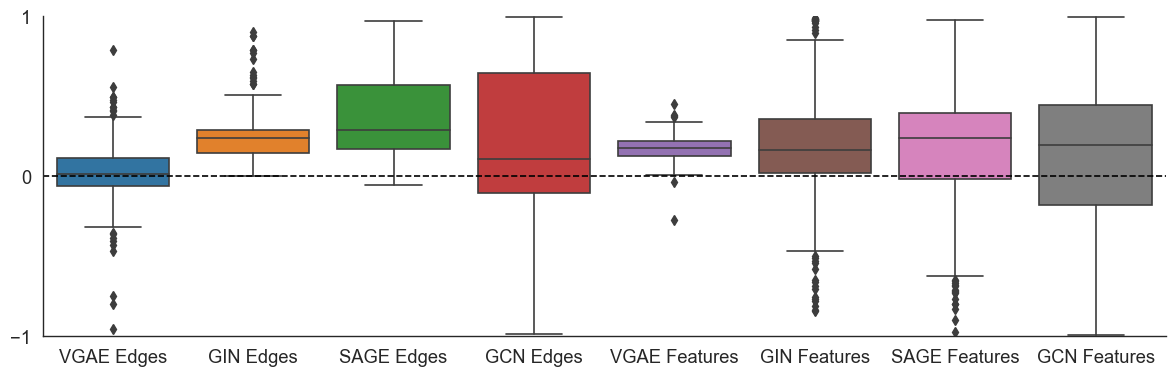

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))
sb.boxplot(df)
ax.axhline(0., c='black', ls='--')
ax.set_ylim([-1, 1])
ax.set_yticks([-1, 0, 1])
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/cora_area_score_{explainer}.png')

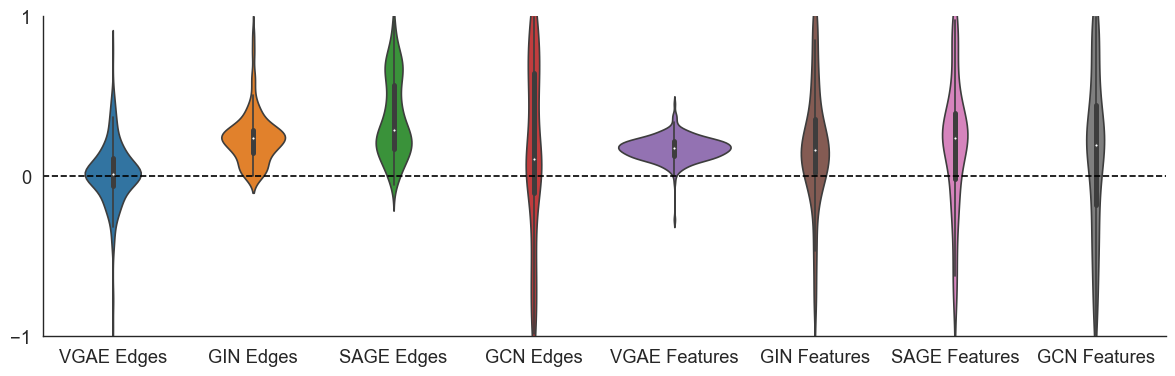

In [20]:
fig, ax = plt.subplots(figsize=(12, 4))
sb.violinplot(df)
ax.axhline(0., c='black', ls='--')
ax.set_ylim([-1, 1])
ax.set_yticks([-1, 0, 1])
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/cora_area_score_{explainer}.png')

# Random

In [39]:
model_name = 'gcn'

edge_deletions = load_curves(graph_model, model_name, 'random', 'edge_deletion', tot_range, target=-1, seed='0')
gcn_edge_scores_rnd = np.array([area_score(d.mean(axis=0)) for d in edge_deletions])

feat_deletions = load_curves(graph_model, model_name, 'random', 'feature_deletion', tot_range, target=-1, seed='0')
gcn_feat_score_rnds = np.array([area_score(d.mean(axis=0)) for d in feat_deletions])

cora gcn random edge_deletion 280 -1
12
cora gcn random feature_deletion 280 -1
11


In [41]:
df_rnd = pd.DataFrame(gcn_edge_scores_rnd[:11], columns=['gcn_edge'])
# df['gin_edge'] = gin_edge_scores[:tot_range]
# df['sage_edge'] = sage_edge_scores[:tot_range]
# df['gcn_edge'] = gcn_edge_scores[:tot_range]
# df['vgae_feat'] = vgae_feat_scores[:tot_range]
# df['gin_feat'] = gin_feat_scores[:tot_range]
# df['sage_feat'] = sage_feat_scores[:tot_range]
df_rnd['gcn_feat'] = gcn_feat_score_rnds[:11]

# df.columns = ['VGAE Edges', 'GIN Edges', 'SAGE Edges', 'GCN Edges', 'VGAE Features', 'GIN Features' , 'SAGE Features' , 'GCN Features']  #

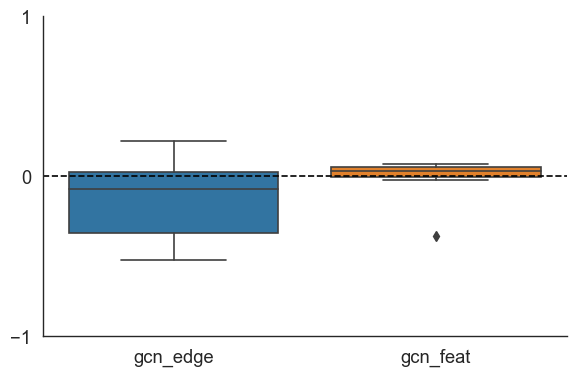

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))
sb.boxplot(df_rnd)
ax.axhline(0., c='black', ls='--')
ax.set_ylim([-1, 1])
ax.set_yticks([-1, 0, 1])
sb.despine()
plt.tight_layout()
# plt.savefig(f'../paper/figs/cora_area_score_{explainer}.png')